In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('sahibinden.csv',encoding='ISO-8859-9')
data.head()

,brand_model,year,km,color,price,state,fuel,gear
0,Acura RSX,2005,40000,Beyaz,95000.0,Tekirdağ,benzin,manuel
1,Alfa Romeo 159,2008,470000,Mavi,48000.0,Kocaeli,dizel,otomatik
2,Alfa Romeo 156,2005,420000,Bordo,28500.0,Kayseri,benzin-lpg,manuel
3,Alfa Romeo 156,1999,356000,Siyah,24000.0,Kastamonu,benzin-lpg,yari-otomatik
4,Alfa Romeo 156,2001,340000,Kırmızı,20000.0,Konya,benzin-lpg,manuel


In [3]:
plt.figure()

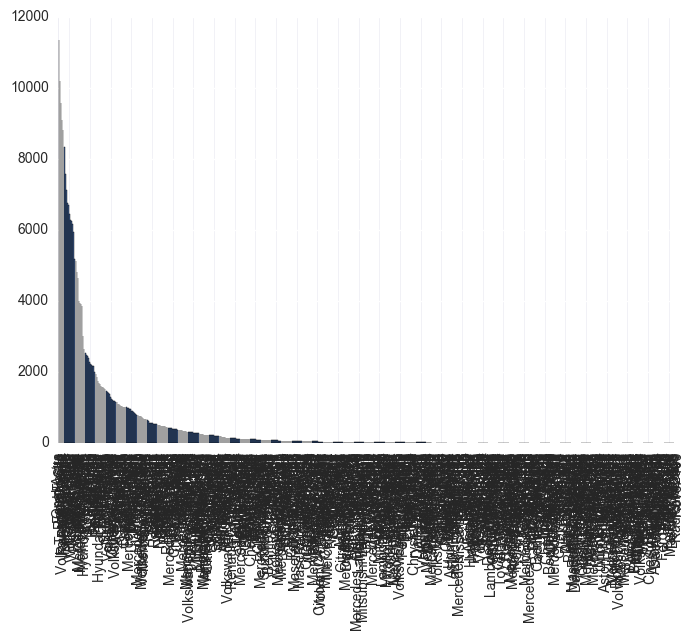

In [4]:
data.brand_model.value_counts().plot(kind='bar')

In [5]:
threshold = 300 # Anything that occurs less than this will be removed.
value_counts = data['brand_model'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
data['brand_model'].replace(to_remove, np.nan, inplace=True)
data=data.dropna()

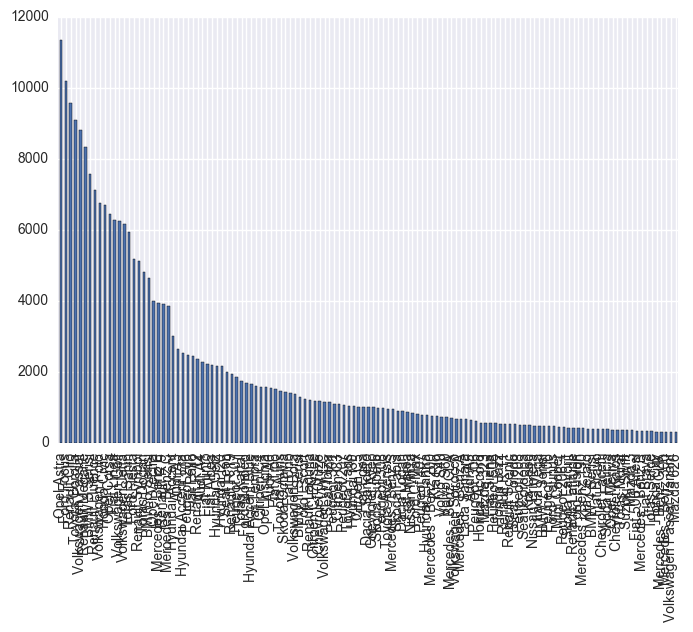

In [6]:
data.brand_model.value_counts().plot(kind='bar')

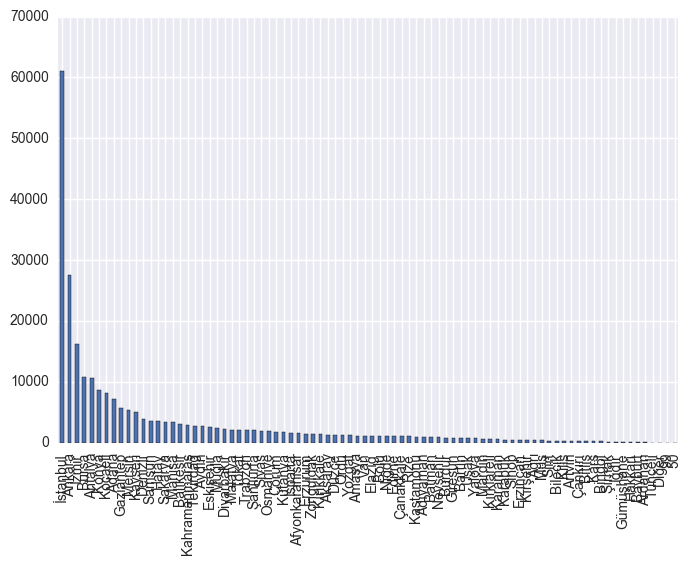

In [7]:
data.state.value_counts().plot(kind='bar')

In [8]:
threshold = 1000 # Anything that occurs less than this will be removed.
value_counts = data['state'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
data['state'].replace(to_remove, np.nan, inplace=True)
data=data.dropna()

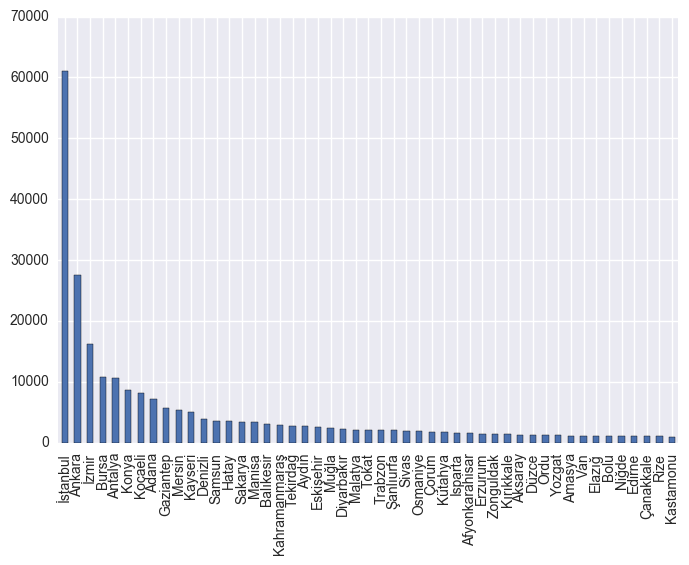

In [9]:
data.state.value_counts().plot(kind='bar')

In [10]:
rk_dummies = pd.get_dummies(data.brand_model, prefix='brand_model').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, rk_dummies], axis=1)
data.drop('brand_model', axis=1, inplace=True)
data.head()

,year,km,color,price,state,fuel,gear,brand_model_Audi A4,brand_model_Audi A5,brand_model_Audi A6,...,brand_model_Volkswagen Bora,brand_model_Volkswagen Golf,brand_model_Volkswagen Jetta,brand_model_Volkswagen Passat,brand_model_Volkswagen Passat Variant,brand_model_Volkswagen Polo,brand_model_Volkswagen Scirocco,brand_model_Volkswagen VW CC,brand_model_Volvo S40,brand_model_Volvo S60
958,2012,1550000,Siyah,162000.0,Ankara,dizel,yari-otomatik,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962,2004,611000,Bej,47000.0,Tekirdağ,dizel,otomatik,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967,2001,485550,Siyah,30000.0,Trabzon,benzin-lpg,yari-otomatik,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,2006,485000,Siyah,66500.0,Ankara,dizel,yari-otomatik,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
969,2006,480000,Siyah,83500.0,Antalya,dizel,yari-otomatik,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
rk_dummies = pd.get_dummies(data.color, prefix='color').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, rk_dummies], axis=1)
data.drop('color', axis=1, inplace=True)
data.head()

,year,km,price,state,fuel,gear,brand_model_Audi A4,brand_model_Audi A5,brand_model_Audi A6,brand_model_BMW 1 Serisi,...,color_Lacivert,color_Mavi,color_Mor,color_Pembe,color_Sarı,color_Siyah,color_Turkuaz,color_Turuncu,color_Yeşil,color_Şampanya
958,2012,1550000,162000.0,Ankara,dizel,yari-otomatik,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
962,2004,611000,47000.0,Tekirdağ,dizel,otomatik,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967,2001,485550,30000.0,Trabzon,benzin-lpg,yari-otomatik,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
968,2006,485000,66500.0,Ankara,dizel,yari-otomatik,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
969,2006,480000,83500.0,Antalya,dizel,yari-otomatik,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
rk_dummies = pd.get_dummies(data.state, prefix='state').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, rk_dummies], axis=1)
data.drop('state', axis=1, inplace=True)
data.head()

,year,km,price,fuel,gear,brand_model_Audi A4,brand_model_Audi A5,brand_model_Audi A6,brand_model_BMW 1 Serisi,brand_model_BMW 3 Serisi,...,state_Tokat,state_Trabzon,state_Van,state_Yozgat,state_Zonguldak,state_Çanakkale,state_Çorum,state_İstanbul,state_İzmir,state_Şanlıurfa
958,2012,1550000,162000.0,dizel,yari-otomatik,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962,2004,611000,47000.0,dizel,otomatik,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967,2001,485550,30000.0,benzin-lpg,yari-otomatik,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,2006,485000,66500.0,dizel,yari-otomatik,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
969,2006,480000,83500.0,dizel,yari-otomatik,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
rk_dummies = pd.get_dummies(data.fuel, prefix='fuel').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, rk_dummies], axis=1)
data.drop('fuel', axis=1, inplace=True)
data.head()

,year,km,price,gear,brand_model_Audi A4,brand_model_Audi A5,brand_model_Audi A6,brand_model_BMW 1 Serisi,brand_model_BMW 3 Serisi,brand_model_BMW 4 Serisi,...,state_Yozgat,state_Zonguldak,state_Çanakkale,state_Çorum,state_İstanbul,state_İzmir,state_Şanlıurfa,fuel_benzin-lpg,fuel_dizel,fuel_hybrid
958,2012,1550000,162000.0,yari-otomatik,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
962,2004,611000,47000.0,otomatik,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
967,2001,485550,30000.0,yari-otomatik,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
968,2006,485000,66500.0,yari-otomatik,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
969,2006,480000,83500.0,yari-otomatik,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
rk_dummies = pd.get_dummies(data.gear, prefix='gear').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, rk_dummies], axis=1)
data.drop('gear', axis=1, inplace=True)
data.head()

,year,km,price,brand_model_Audi A4,brand_model_Audi A5,brand_model_Audi A6,brand_model_BMW 1 Serisi,brand_model_BMW 3 Serisi,brand_model_BMW 4 Serisi,brand_model_BMW 5 Serisi,...,state_Çanakkale,state_Çorum,state_İstanbul,state_İzmir,state_Şanlıurfa,fuel_benzin-lpg,fuel_dizel,fuel_hybrid,gear_otomatik,gear_yari-otomatik
958,2012,1550000,162000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
962,2004,611000,47000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
967,2001,485550,30000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
968,2006,485000,66500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
969,2006,480000,83500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
age=(2017 - data['year'].shift())
data.drop('year', axis=1, inplace=True)

In [16]:
data = pd.concat([data, age], axis=1)
data.head()

,km,price,brand_model_Audi A4,brand_model_Audi A5,brand_model_Audi A6,brand_model_BMW 1 Serisi,brand_model_BMW 3 Serisi,brand_model_BMW 4 Serisi,brand_model_BMW 5 Serisi,brand_model_BMW 7 Serisi,...,state_Çorum,state_İstanbul,state_İzmir,state_Şanlıurfa,fuel_benzin-lpg,fuel_dizel,fuel_hybrid,gear_otomatik,gear_yari-otomatik,year
958,1550000,162000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
962,611000,47000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0
967,485550,30000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0
968,485000,66500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16.0
969,480000,83500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.0


In [17]:
data=data.dropna()
data.head()

,km,price,brand_model_Audi A4,brand_model_Audi A5,brand_model_Audi A6,brand_model_BMW 1 Serisi,brand_model_BMW 3 Serisi,brand_model_BMW 4 Serisi,brand_model_BMW 5 Serisi,brand_model_BMW 7 Serisi,...,state_Çorum,state_İstanbul,state_İzmir,state_Şanlıurfa,fuel_benzin-lpg,fuel_dizel,fuel_hybrid,gear_otomatik,gear_yari-otomatik,year
962,611000,47000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0
967,485550,30000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0
968,485000,66500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16.0
969,480000,83500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.0
970,478000,67500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.0


In [18]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

C:\Users\Burhan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
list(data)

['km',
 'price',
 'brand_model_Audi A4',
 'brand_model_Audi A5',
 'brand_model_Audi A6',
 'brand_model_BMW 1 Serisi',
 'brand_model_BMW 3 Serisi',
 'brand_model_BMW 4 Serisi',
 'brand_model_BMW 5 Serisi',
 'brand_model_BMW 7 Serisi',
 'brand_model_Chevrolet Aveo',
 'brand_model_Chevrolet Cruze',
 'brand_model_Chevrolet Kalos',
 'brand_model_Chevrolet Lacetti',
 'brand_model_Citroën C-Elysée',
 'brand_model_Citroën C3',
 'brand_model_Citroën C4',
 'brand_model_Citroën C5',
 'brand_model_Dacia Logan',
 'brand_model_Dacia Sandero',
 'brand_model_Fiat 500 Ailesi',
 'brand_model_Fiat Albea',
 'brand_model_Fiat Brava',
 'brand_model_Fiat Bravo',
 'brand_model_Fiat Egea',
 'brand_model_Fiat Linea',
 'brand_model_Fiat Marea',
 'brand_model_Fiat Palio',
 'brand_model_Fiat Punto',
 'brand_model_Fiat Siena',
 'brand_model_Fiat Tempra',
 'brand_model_Fiat Tipo',
 'brand_model_Fiat Uno',
 'brand_model_Ford C-Max',
 'brand_model_Ford Escort',
 'brand_model_Ford Fiesta',
 'brand_model_Ford Focus',
 '

In [20]:
regr = linear_model.LinearRegression()

In [21]:
X= data[['km',
 'brand_model_Audi A4',
 'brand_model_Audi A5',
 'brand_model_Audi A6',
 'brand_model_BMW 1 Serisi',
 'brand_model_BMW 3 Serisi',
 'brand_model_BMW 4 Serisi',
 'brand_model_BMW 5 Serisi',
 'brand_model_BMW 7 Serisi',
 'brand_model_Chevrolet Aveo',
 'brand_model_Chevrolet Cruze',
 'brand_model_Chevrolet Kalos',
 'brand_model_Chevrolet Lacetti',
 'brand_model_Citroën C-Elysée',
 'brand_model_Citroën C3',
 'brand_model_Citroën C4',
 'brand_model_Citroën C5',
 'brand_model_Dacia Logan',
 'brand_model_Dacia Sandero',
 'brand_model_Fiat 500 Ailesi',
 'brand_model_Fiat Albea',
 'brand_model_Fiat Brava',
 'brand_model_Fiat Bravo',
 'brand_model_Fiat Egea',
 'brand_model_Fiat Linea',
 'brand_model_Fiat Marea',
 'brand_model_Fiat Palio',
 'brand_model_Fiat Punto',
 'brand_model_Fiat Siena',
 'brand_model_Fiat Tempra',
 'brand_model_Fiat Tipo',
 'brand_model_Fiat Uno',
 'brand_model_Ford C-Max',
 'brand_model_Ford Escort',
 'brand_model_Ford Fiesta',
 'brand_model_Ford Focus',
 'brand_model_Ford Fusion',
 'brand_model_Ford Mondeo',
 'brand_model_Ford Taunus',
 'brand_model_Honda Accord',
 'brand_model_Honda City',
 'brand_model_Honda Civic',
 'brand_model_Honda Jazz',
 'brand_model_Hyundai Accent',
 'brand_model_Hyundai Accent Blue',
 'brand_model_Hyundai Accent Era',
 'brand_model_Hyundai Elantra',
 'brand_model_Hyundai Getz',
 'brand_model_Hyundai i20',
 'brand_model_Hyundai i30',
 'brand_model_Kia Ceed',
 'brand_model_Kia Cerato',
 'brand_model_Kia Rio',
 'brand_model_Lada Samara',
 'brand_model_Lada Vega',
 'brand_model_Mazda 3',
 'brand_model_Mazda 323',
 'brand_model_Mazda 626',
 'brand_model_Mercedes - Benz 190',
 'brand_model_Mercedes - Benz 200',
 'brand_model_Mercedes - Benz 300',
 'brand_model_Mercedes - Benz A',
 'brand_model_Mercedes - Benz B',
 'brand_model_Mercedes - Benz C',
 'brand_model_Mercedes - Benz CLA',
 'brand_model_Mercedes - Benz CLK',
 'brand_model_Mercedes - Benz E',
 'brand_model_Mercedes - Benz S',
 'brand_model_Mini Cooper',
 'brand_model_Nissan Micra',
 'brand_model_Nissan Primera',
 'brand_model_Opel Astra',
 'brand_model_Opel Corsa',
 'brand_model_Opel Insignia',
 'brand_model_Opel Meriva',
 'brand_model_Opel Vectra',
 'brand_model_Peugeot 106',
 'brand_model_Peugeot 206',
 'brand_model_Peugeot 206 +',
 'brand_model_Peugeot 207',
 'brand_model_Peugeot 208',
 'brand_model_Peugeot 301',
 'brand_model_Peugeot 306',
 'brand_model_Peugeot 307',
 'brand_model_Peugeot 308',
 'brand_model_Peugeot 407',
 'brand_model_Peugeot 508',
 'brand_model_Renault Clio',
 'brand_model_Renault Fluence',
 'brand_model_Renault Laguna',
 'brand_model_Renault Latitude',
 'brand_model_Renault Megane',
 'brand_model_Renault R 11',
 'brand_model_Renault R 12',
 'brand_model_Renault R 19',
 'brand_model_Renault R 9',
 'brand_model_Renault Scenic',
 'brand_model_Renault Symbol',
 'brand_model_Seat Cordoba',
 'brand_model_Seat Ibiza',
 'brand_model_Seat Leon',
 'brand_model_Seat Toledo',
 'brand_model_Skoda Fabia',
 'brand_model_Skoda Favorit',
 'brand_model_Skoda Felicia',
 'brand_model_Skoda Octavia',
 'brand_model_Skoda Superb',
 'brand_model_Suzuki Swift',
 'brand_model_Tofaş Doğan',
 'brand_model_Tofaş Kartal',
 'brand_model_Tofaş Murat',
 'brand_model_Tofaş Serçe',
 'brand_model_Tofaş Şahin',
 'brand_model_Toyota Auris',
 'brand_model_Toyota Avensis',
 'brand_model_Toyota Corolla',
 'brand_model_Toyota Yaris',
 'brand_model_Volkswagen Bora',
 'brand_model_Volkswagen Golf',
 'brand_model_Volkswagen Jetta',
 'brand_model_Volkswagen Passat',
 'brand_model_Volkswagen Passat Variant',
 'brand_model_Volkswagen Polo',
 'brand_model_Volkswagen Scirocco',
 'brand_model_Volkswagen VW CC',
 'brand_model_Volvo S40',
 'brand_model_Volvo S60',
 'color_Beyaz',
 'color_Bordo',
 'color_Füme',
 'color_Gri',
 'color_Gümüş Gri',
 'color_Kahverengi',
 'color_Kırmızı',
 'color_Lacivert',
 'color_Mavi',
 'color_Mor',
 'color_Pembe',
 'color_Sarı',
 'color_Siyah',
 'color_Turkuaz',
 'color_Turuncu',
 'color_Yeşil',
 'color_Şampanya',
 'state_Afyonkarahisar',
 'state_Aksaray',
 'state_Amasya',
 'state_Ankara',
 'state_Antalya',
 'state_Aydın',
 'state_Balıkesir',
 'state_Bolu',
 'state_Bursa',
 'state_Denizli',
 'state_Diyarbakır',
 'state_Düzce',
 'state_Edirne',
 'state_Elazığ',
 'state_Erzurum',
 'state_Eskişehir',
 'state_Gaziantep',
 'state_Hatay',
 'state_Isparta',
 'state_Kahramanmaraş',
 'state_Kastamonu',
 'state_Kayseri',
 'state_Kocaeli',
 'state_Konya',
 'state_Kütahya',
 'state_Kırıkkale',
 'state_Malatya',
 'state_Manisa',
 'state_Mersin',
 'state_Muğla',
 'state_Niğde',
 'state_Ordu',
 'state_Osmaniye',
 'state_Rize',
 'state_Sakarya',
 'state_Samsun',
 'state_Sivas',
 'state_Tekirdağ',
 'state_Tokat',
 'state_Trabzon',
 'state_Van',
 'state_Yozgat',
 'state_Zonguldak',
 'state_Çanakkale',
 'state_Çorum',
 'state_İstanbul',
 'state_İzmir',
 'state_Şanlıurfa',
 'fuel_benzin-lpg',
 'fuel_dizel',
 'fuel_hybrid',
 'gear_otomatik',
 'gear_yari-otomatik',
 'year']]
y= data['price']

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

In [23]:
regr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print('Coefficients: \n', regr.coef_)
print('The intercept: \n', regr.intercept_)

Coefficients: 
 [ -1.32143918e-01   2.34363066e+04   6.87357406e+04   5.95540535e+04
   5.32083095e+03   2.41967918e+04   1.26429617e+05   6.15812330e+04
   1.52627787e+05  -3.38650362e+04  -2.46940002e+04  -2.84276277e+04
  -2.56207174e+04  -3.80619703e+04  -3.23023700e+04  -2.73573541e+04
  -2.02483258e+04  -3.18771518e+04  -3.68781797e+04  -2.73209794e+04
  -2.25753894e+04  -1.35164839e+04  -2.17260927e+04  -2.81998282e+04
  -3.82366097e+04  -1.38709002e+04  -2.24718306e+04  -3.03564891e+04
  -1.58554599e+04  -2.03136114e+04  -1.64425102e+04  -1.73959059e+04
  -1.15356919e+04  -1.88279149e+04  -2.85567626e+04  -1.61599472e+04
  -2.24755040e+04  -7.39498854e+03  -2.43933858e+04   6.13332904e+03
  -2.15910546e+04  -4.66484959e+03  -1.91693276e+04  -1.73060745e+04
  -3.07901481e+04  -2.55203295e+04  -1.43897234e+04  -2.90645272e+04
  -3.27880639e+04  -2.00907602e+04  -2.02793889e+04  -2.09535391e+04
  -3.08549466e+04  -2.42569092e+04  -2.24087248e+04  -2.86006811e+03
  -4.74326449e+03 

In [25]:
from sklearn.metrics import mean_squared_error
print("Mean_squared_error: %.2f" % mean_squared_error(y_test, regr.predict(X_test)))
from sklearn.metrics import r2_score 
print("r2_score: %.2f" % r2_score(y_test, regr.predict(X_test)))

Mean_squared_error: 3717594526.15
r2_score: 0.29


In [26]:
from sklearn.model_selection import cross_val_score
regr1 = linear_model.LinearRegression()

scoresMSE= cross_val_score(regr1, X, y, cv=5, scoring='neg_mean_squared_error') #  5-fold cross validation. 
print("Negative Mean Squared Errors: "+ str(list(scoresMSE)))
print('Mean:%.2f' %scoresMSE.mean())

scoresR2= cross_val_score(regr1, X, y, cv=5, scoring='r2') #  5-fold cross validation. 
print("R2 scores: "+ str(list(scoresR2)))
print("r2_score: %.2f" % scoresR2.mean())

Negative Mean Squared Errors: [-5671197997.7075968, -1331779572.3546629, -4853671804.8906555, -529524790.58786231, -338684788.01886106]
Mean:-2544971790.71
R2 scores: [0.11589817155240101, -2.4303905311230709, 0.28888598342266192, -0.16002513489039871, 0.60636679940833593]
r2_score: -0.32


In [27]:
# Recursive feature elimination with cross-validation:
# automatic tuning of the number of features selected with cross-validation.
X= data[['km',
 'brand_model_Audi A4',
 'brand_model_Audi A5',
 'brand_model_Audi A6',
 'brand_model_BMW 1 Serisi',
 'brand_model_BMW 3 Serisi',
 'brand_model_BMW 4 Serisi',
 'brand_model_BMW 5 Serisi',
 'brand_model_BMW 7 Serisi',
 'brand_model_Chevrolet Aveo',
 'brand_model_Chevrolet Cruze',
 'brand_model_Chevrolet Kalos',
 'brand_model_Chevrolet Lacetti',
 'brand_model_Citroën C-Elysée',
 'brand_model_Citroën C3',
 'brand_model_Citroën C4',
 'brand_model_Citroën C5',
 'brand_model_Dacia Logan',
 'brand_model_Dacia Sandero',
 'brand_model_Fiat 500 Ailesi',
 'brand_model_Fiat Albea',
 'brand_model_Fiat Brava',
 'brand_model_Fiat Bravo',
 'brand_model_Fiat Egea',
 'brand_model_Fiat Linea',
 'brand_model_Fiat Marea',
 'brand_model_Fiat Palio',
 'brand_model_Fiat Punto',
 'brand_model_Fiat Siena',
 'brand_model_Fiat Tempra',
 'brand_model_Fiat Tipo',
 'brand_model_Fiat Uno',
 'brand_model_Ford C-Max',
 'brand_model_Ford Escort',
 'brand_model_Ford Fiesta',
 'brand_model_Ford Focus',
 'brand_model_Ford Fusion',
 'brand_model_Ford Mondeo',
 'brand_model_Ford Taunus',
 'brand_model_Honda Accord',
 'brand_model_Honda City',
 'brand_model_Honda Civic',
 'brand_model_Honda Jazz',
 'brand_model_Hyundai Accent',
 'brand_model_Hyundai Accent Blue',
 'brand_model_Hyundai Accent Era',
 'brand_model_Hyundai Elantra',
 'brand_model_Hyundai Getz',
 'brand_model_Hyundai i20',
 'brand_model_Hyundai i30',
 'brand_model_Kia Ceed',
 'brand_model_Kia Cerato',
 'brand_model_Kia Rio',
 'brand_model_Lada Samara',
 'brand_model_Lada Vega',
 'brand_model_Mazda 3',
 'brand_model_Mazda 323',
 'brand_model_Mazda 626',
 'brand_model_Mercedes - Benz 190',
 'brand_model_Mercedes - Benz 200',
 'brand_model_Mercedes - Benz 300',
 'brand_model_Mercedes - Benz A',
 'brand_model_Mercedes - Benz B',
 'brand_model_Mercedes - Benz C',
 'brand_model_Mercedes - Benz CLA',
 'brand_model_Mercedes - Benz CLK',
 'brand_model_Mercedes - Benz E',
 'brand_model_Mercedes - Benz S',
 'brand_model_Mini Cooper',
 'brand_model_Nissan Micra',
 'brand_model_Nissan Primera',
 'brand_model_Opel Astra',
 'brand_model_Opel Corsa',
 'brand_model_Opel Insignia',
 'brand_model_Opel Meriva',
 'brand_model_Opel Vectra',
 'brand_model_Peugeot 106',
 'brand_model_Peugeot 206',
 'brand_model_Peugeot 206 +',
 'brand_model_Peugeot 207',
 'brand_model_Peugeot 208',
 'brand_model_Peugeot 301',
 'brand_model_Peugeot 306',
 'brand_model_Peugeot 307',
 'brand_model_Peugeot 308',
 'brand_model_Peugeot 407',
 'brand_model_Peugeot 508',
 'brand_model_Renault Clio',
 'brand_model_Renault Fluence',
 'brand_model_Renault Laguna',
 'brand_model_Renault Latitude',
 'brand_model_Renault Megane',
 'brand_model_Renault R 11',
 'brand_model_Renault R 12',
 'brand_model_Renault R 19',
 'brand_model_Renault R 9',
 'brand_model_Renault Scenic',
 'brand_model_Renault Symbol',
 'brand_model_Seat Cordoba',
 'brand_model_Seat Ibiza',
 'brand_model_Seat Leon',
 'brand_model_Seat Toledo',
 'brand_model_Skoda Fabia',
 'brand_model_Skoda Favorit',
 'brand_model_Skoda Felicia',
 'brand_model_Skoda Octavia',
 'brand_model_Skoda Superb',
 'brand_model_Suzuki Swift',
 'brand_model_Tofaş Doğan',
 'brand_model_Tofaş Kartal',
 'brand_model_Tofaş Murat',
 'brand_model_Tofaş Serçe',
 'brand_model_Tofaş Şahin',
 'brand_model_Toyota Auris',
 'brand_model_Toyota Avensis',
 'brand_model_Toyota Corolla',
 'brand_model_Toyota Yaris',
 'brand_model_Volkswagen Bora',
 'brand_model_Volkswagen Golf',
 'brand_model_Volkswagen Jetta',
 'brand_model_Volkswagen Passat',
 'brand_model_Volkswagen Passat Variant',
 'brand_model_Volkswagen Polo',
 'brand_model_Volkswagen Scirocco',
 'brand_model_Volkswagen VW CC',
 'brand_model_Volvo S40',
 'brand_model_Volvo S60',
 'color_Beyaz',
 'color_Bordo',
 'color_Füme',
 'color_Gri',
 'color_Gümüş Gri',
 'color_Kahverengi',
 'color_Kırmızı',
 'color_Lacivert',
 'color_Mavi',
 'color_Mor',
 'color_Pembe',
 'color_Sarı',
 'color_Siyah',
 'color_Turkuaz',
 'color_Turuncu',
 'color_Yeşil',
 'color_Şampanya',
 'state_Afyonkarahisar',
 'state_Aksaray',
 'state_Amasya',
 'state_Ankara',
 'state_Antalya',
 'state_Aydın',
 'state_Balıkesir',
 'state_Bolu',
 'state_Bursa',
 'state_Denizli',
 'state_Diyarbakır',
 'state_Düzce',
 'state_Edirne',
 'state_Elazığ',
 'state_Erzurum',
 'state_Eskişehir',
 'state_Gaziantep',
 'state_Hatay',
 'state_Isparta',
 'state_Kahramanmaraş',
 'state_Kastamonu',
 'state_Kayseri',
 'state_Kocaeli',
 'state_Konya',
 'state_Kütahya',
 'state_Kırıkkale',
 'state_Malatya',
 'state_Manisa',
 'state_Mersin',
 'state_Muğla',
 'state_Niğde',
 'state_Ordu',
 'state_Osmaniye',
 'state_Rize',
 'state_Sakarya',
 'state_Samsun',
 'state_Sivas',
 'state_Tekirdağ',
 'state_Tokat',
 'state_Trabzon',
 'state_Van',
 'state_Yozgat',
 'state_Zonguldak',
 'state_Çanakkale',
 'state_Çorum',
 'state_İstanbul',
 'state_İzmir',
 'state_Şanlıurfa',
 'fuel_benzin-lpg',
 'fuel_dizel',
 'fuel_hybrid',
 'gear_otomatik',
 'gear_yari-otomatik',
 'year']]
y= data['price']

In [28]:
# recursive feature elimination and cross-validated selection of the best number of features
from sklearn.feature_selection import RFECV

Optimal number of features : 184
Index(['km', 'brand_model_Audi A4', 'brand_model_Audi A5',
       'brand_model_Audi A6', 'brand_model_BMW 1 Serisi',
       'brand_model_BMW 3 Serisi', 'brand_model_BMW 4 Serisi',
       'brand_model_BMW 5 Serisi', 'brand_model_BMW 7 Serisi',
       'brand_model_Chevrolet Aveo',
       ...
       'state_Çorum', 'state_İstanbul', 'state_İzmir', 'state_Şanlıurfa',
       'fuel_benzin-lpg', 'fuel_dizel', 'fuel_hybrid', 'gear_otomatik',
       'gear_yari-otomatik', 'year'],
      dtype='object', length=198)
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  

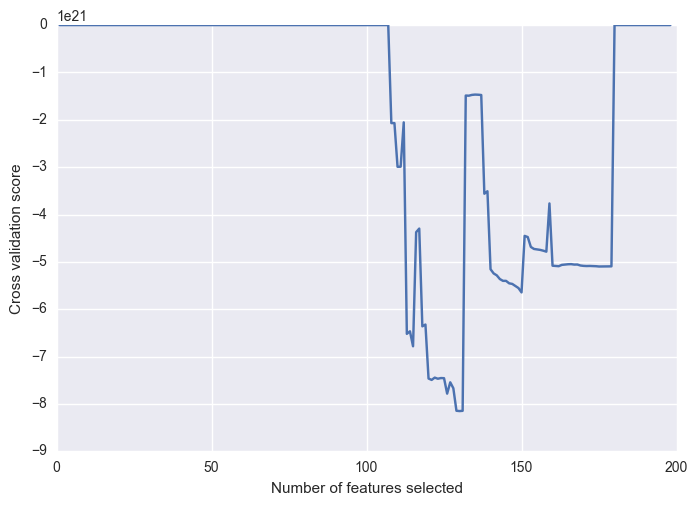

In [29]:
regr = linear_model.LinearRegression()
rfecv = RFECV(estimator=regr, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
print(X.columns)
print(rfecv.support_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Optimal number of features : 184
[ -6.31260304e-01  -6.23950332e-01  -6.16135604e-01  -7.31906047e-01
  -7.27290485e-01  -6.84901333e-01  -6.75254509e-01  -6.54288742e-01
  -5.04658191e-01  -4.27529535e-01  -4.18320355e-01  -4.17951525e-01
  -4.18336871e-01  -4.18230834e-01  -4.17360777e-01  -3.83700947e-01
  -3.38833512e-01  -3.40658484e-01  -3.47722078e-01  -3.45036303e-01
  -3.45820181e-01  -3.47427111e-01  -3.54388534e-01  -3.25746766e-01
  -3.25772195e-01  -3.27419050e-01  -3.22705051e-01  -3.22786166e-01
  -3.26968278e-01  -3.06116721e-01  -3.17472516e-01  -3.16535387e-01
  -3.20058657e-01  -3.18473464e-01  -3.18174919e-01  -3.17244397e-01
  -3.15018432e-01  -3.14434125e-01  -3.14440480e-01  -3.14185867e-01
  -3.16516498e-01  -3.16520931e-01  -3.14356632e-01  -3.13248178e-01
  -3.11912928e-01  -3.11766033e-01  -3.12354806e-01  -3.10971842e-01
  -3.10988701e-01  -3.09949506e-01  -3.08971313e-01  -3.06531322e-01
  -3.06024558e-01  -3.05256044e-01  -3.03837911e-01  -3.03559348e-01
 

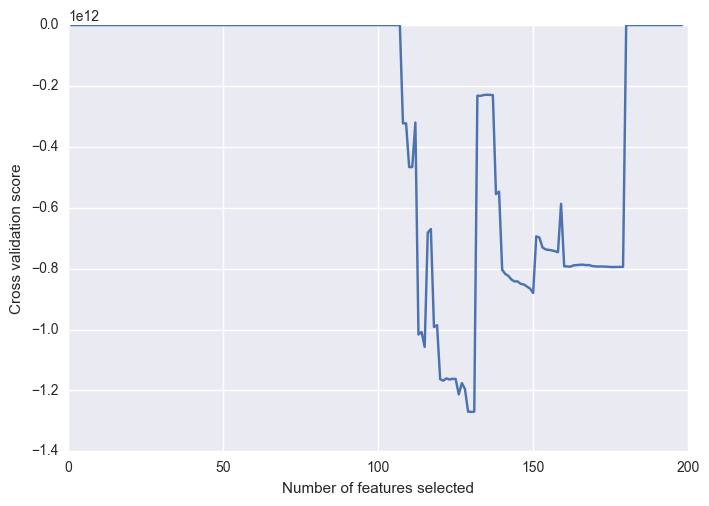

In [30]:
regr = linear_model.LinearRegression()

# The "r2" scoring:
rfecv = RFECV(estimator=regr, step=1, cv=5, scoring='r2')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.grid_scores_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()